# Game Show Strategy Simulation

In this project, I simulate the conditional probabilities of the distributions for winning a car versus winning a goat on the Let's Make a Deal television show hosted by Monty Hall. I make the case for the best strategy to win the car.

Description of the game show rules:

The television show, Let's Make a Deal, was created and hosted by Monty Hall in the 1970s. At the finale of a show, Monty would tell the winning contestant that they could pick one of three doors. Behind one door would be a car, but goats were placed behind the other two doors. The contestant picks a door. Now, Monty builds the suspense by opening one of the other doors. Monty knew which door had the car so he'd always reveal one of the goats. He would then tell the contestant that they could change their choice of doors if they wanted. The question is, should the contestant switch or stick with their original choice?

In [1]:
# Import libraries
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import random

# Conditional Probability Solution of Monty Hall Game

Since there is a probability of 2/3 that your first door selection is a goat, the probability of Monty selecting another door containing a goat is 1 because he cannot reveal the door holding the car. Therefore, if you switch at this point you have a 2/3 chance of winning compared to a 0 probability of winning the car.

However, if you first selection is in fact the new car (a 1/3 probability), Monty now has a 1/2 probability of opening either of the two doors containing the goat. At this point, if you switch you will have a 0 probability of winning the car but if you stay you have a 1/3 probability of winning. After these probabilities are summed it's clear that you're better off switching your choice (2/3 probability of winning the car) versus staying with your original door choice (1/3 chance of winning the car.

In this project, I will simulate the outcomes of 10,000 games to determine what the best strategy is.

The case for staying is the chance that you picked the correct door on the first try and the case for switching is that you now have the chance to pick between two remaining doors instead of the original three. Let's see how these two strategies work out in the simulation.

# Simulation of Monty Hall Game

Above, it's clear that based on the conditional probabilities solution, switching your door choice results in a higher chance of winning the new car. Below, I've written a loop to simulate the outcome of 10,000 games to calculate the number of wins earned from staying versus switching your door choice. 

I started by setting the number of simulations to perform (10,000) and created empty arrays to hold the number of wins obtained from staying or switching. Inside the loop, I created an array to hold the items behind each door (goat, goat, car). I randomly shuffled the values in the array and randomly selected a number between 1 and 3 to index a particular value in the array, designating a door and the randomized item behind it. 

If the first door selection was the car, you win the car if you stay but lose if you switch, so I added the 1 value to the stay_wins array and a 0 value to the switch_wins array. 

However, if the first door selection was a goat, you win the car if you switch but lose if you stay, so in this case, I added the 1 value to the switch_wins array and a 0 value to the stay_wins array

These commands are executed over 10,000 games and the outcomes are held in the stay_wins and switch_wins arrays.

Outside of the loop, I created a data frame to hold the outcomes of each simulated game.

In [2]:
# Set the number of simulated games to perform
num_sims = 100000

# Create arrays to hold the number of wins obtained from switching or staying
stay_w = []
switch_w = []

# Loop through possible scenarios to simulate the outcomes of the Monty Hall game
for x in range(0, num_sims):
    doors = ['goat', 'goat', 'car'] # set the values for each door
    random.shuffle(doors) # randomize item behind each door
    n = random.randrange(3) # randomly select first door
    if doors[n] == 'car':
        stay_w.append(1) # stay outcome if first door selection is the car
        switch_w.append(0) # switch outcome if first door selection is the car
    if doors[n] == 'goat':
        stay_w.append(0) # stay outcome if first door selection is a goat
        switch_w.append(1) # switch outcome if first door selection is a goat
        
# Create a dataframe to hold all of the outcomes of each simulated game
results = pd.DataFrame({
    'stay_wins': stay_w,
    'switch_wins': switch_w,    
})

# Take a look at the first five rows of the data frame
results.head()

,stay_wins,switch_wins
0,0,1
1,0,1
2,0,1
3,0,1
4,1,0


# Computing Winning Percentages Based on Simulations

Below I've calculated the winning percentages based on 10,000 simulated games. To do this I've summed the stay_wins column and the switch_wins column from the results data frame created above to get the total number of wins based on each strategy and then divided these values by the total number of games. 

As you can see below, the winning percentages match the results obtained from the conditional probability solution. If you stay with your original door choice, you have a 33.3% chance of winning the car but if you switch your door choice, you have a 66.7% chance of winning the car.

In [3]:
# Sum each column of the data frame to determine the total number of wins obtained from staying or switching door choice
total_stay_w = results.stay_wins.sum()
total_switch_w = results.switch_wins.sum()

# Compute the total number of games by adding the total wins from each strategy
total_games = total_stay_w + total_switch_w

# Calculate the winning percentages based on each strategy
stay_wpct = total_stay_w / total_games
switch_wpct = total_switch_w / total_games

# Print the winning percetanges associated with each strategy
print('Stay Win Percentage: ', stay_wpct)
print('Switch Win Percentage: ', switch_wpct)

Stay Win Percentage:  0.3312
Switch Win Percentage:  0.6688


# Describing the Results as a Bernoulli Distribution

Because this problem results in binary outcomes, the distribution of the results can be described as a Bernoulli Distribution.  There are two possible states: winning and losing (denoted as 1 and 0, respectively in the results data frame). Bernoulli distributions can be described with p equal to the probability of winning and the variance as p(1-p). 

Below, I looked at the summary statistics for the data frame using the describe() function. Then, I calculated the variance of each strategy. The variance of winning with the either strategy is 0.22. 

Next, I plotted the distribution of the number of wins and losses associated with each strategy as a histogram. It's clear that the strategy of staying with the original door choice results in many more losses and the switching strategy results in a higher number of wins. These distributions confirm and visually represent the winning percentages calculated above. 

In [4]:
# Print the summary statistics associated with the simulated game results
print(results.describe())

# Calculate and print the variance associated with the stay strategy
stay_var = results.stay_wins.mean() * (1 - results.stay_wins.mean())
print('Staying Strategy Variance = ' , stay_var)

# Calculate and print the variance associated with the switching strategy
switch_var = results.switch_wins.mean() * (1 - results.switch_wins.mean())
print('Switching Strategy Variance = ', switch_var)


           stay_wins    switch_wins
count  100000.000000  100000.000000
mean        0.331200       0.668800
std         0.470647       0.470647
min         0.000000       0.000000
25%         0.000000       0.000000
50%         0.000000       1.000000
75%         1.000000       1.000000
max         1.000000       1.000000
Staying Strategy Variance =  0.22150656000000002
Switching Strategy Variance =  0.22150656000000002


Text(0.5, 1.0, 'Simulated Game Outcomes with the Staying Strategy')

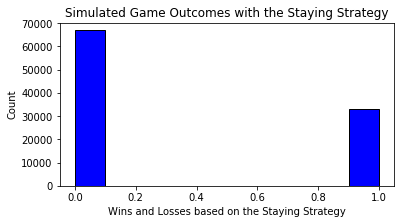

In [5]:
# Plot the Bernoulli distribution of the staying strategy
plt.figure(figsize=(6, 3)) # set plot parameters
plt.hist(results.stay_wins, color='blue', edgecolor='black')
plt.xlabel('Wins and Losses based on the Staying Strategy')
plt.ylabel('Count')
plt.title('Simulated Game Outcomes with the Staying Strategy')

Text(0.5, 1.0, 'Simulated Game Outcomes with the Switching Strategy')

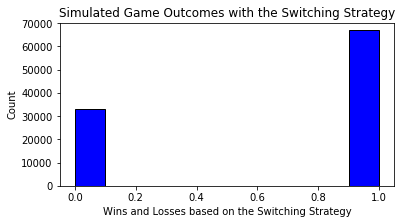

In [6]:
# Plot the Bernoulli distribution of the switching strategy
plt.figure(figsize=(6, 3)) # set plot parameters
plt.hist(results.switch_wins, color='blue', edgecolor='black')
plt.xlabel('Wins and Losses based on the Switching Strategy')
plt.ylabel('Count')
plt.title('Simulated Game Outcomes with the Switching Strategy')

# Conclusion: Comparision of Strategies and Recommendation

The simulation of 10,000 games and the associated outcomes based on two strategies to win the Monty Hall game have been executed above to determine if staying with the original door selection or switching the door selection after Monty opens a door will result in a better chance of winning a car. Using conditional probabilities to solve this problem results in a 1/3 chance of winning the car if you stay with the original door choice and a 2/3 chance of winning the car if you switch from the original door selection.

After simulating 10,000 games, the conditional probability solution is confirmed with a 33.3% winning percentage when you stay with the original door choice compared to a 66.7% winning percentage when you switch the door selection after Monty opens a door. 

Looking at these results using the principles of Bernoulli distributions, I calculated the mean and variance associated with each strategy. The means of each strategy match the winning percentages, with the stay strategy mean of 0.33 and the switch strategy mean of 0.66. The variance of both strategies is 0.22.

The histograms plotted above visually represent the winning percentages and probability distributions associated with each strategy. Based on these plots, it's clear that there is a better chance of winning if you switch your door selection after Monty opens a door. 

Taking into account the conditional probability solution and the outcomes of 10,000 simulated games (including analyses to examine the winning percentages, as well as the associated means, variance, and histograms of each strategy) it's clear that you have a better chance of winning the car if you switch your door selection after Monty opens a door (66.6% chance of winning) as opposed to staying with your original door selection (33.3% chance of winning).